# LINEAR REGRESSION FOR STOCK PRICE PREDICTION (TIME SERIES)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print TOP 5 RECORD
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [3]:
# Data Frame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
Date                    2100 non-null object
Open                    2100 non-null float64
High                    2100 non-null float64
Low                     2100 non-null float64
Last                    2100 non-null float64
Close                   2100 non-null float64
Total Trade Quantity    2100 non-null float64
Turnover (Lacs)         2100 non-null float64
dtypes: float64(7), object(1)
memory usage: 131.4+ KB


In [4]:
# DATA CLEANING 
# CHECK ANY NULL VALUE IS PRESENT OR NOT
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
# CHECK ANY VALUE IS MISSING OR NOT
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
# Convert Date Column data type Object to Year-Month-day
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#setting index as date
df.index = df['Date']

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [7]:
# SORT DATA FRAME BY INDEX ASENDING ORDER
df = df.sort_index()

print('AFTER SORTING BY DATE(INDEX) ASC ORDER')
df.head()

AFTER SORTING BY DATE(INDEX) ASC ORDER


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [8]:
# changing columns NAME with rename() 
data_changed_colname = df.rename(columns = {"Total Trade Quantity": "T_Q", 
                                            "Turnover (Lacs)":"TOver"
                                           }) 

data_changed_colname.head()

,Date,Open,High,Low,Last,Close,T_Q,TOver
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [9]:
print('VIEW CORELATION MATRIX ')
corel_matrix = data_changed_colname.corr()

# PRINT CORELATION MATRIX USING COLOR
corel_matrix.style.background_gradient()

VIEW CORELATION MATRIX 


,Open,High,Low,Last,Close,T_Q,TOver
Open,1,0.998996,0.998829,0.997776,0.997841,0.365334,0.594218
High,0.998996,1,0.998774,0.999154,0.999197,0.385175,0.611422
Low,0.998829,0.998774,1,0.999038,0.999106,0.359832,0.589656
Last,0.997776,0.999154,0.999038,1,0.99996,0.378315,0.605601
Close,0.997841,0.999197,0.999106,0.99996,1,0.377886,0.605215
T_Q,0.365334,0.385175,0.359832,0.378315,0.377886,1,0.927437
TOver,0.594218,0.611422,0.589656,0.605601,0.605215,0.927437,1


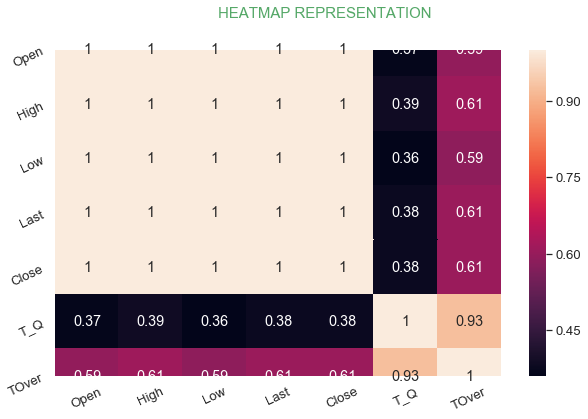

In [10]:
plt.figure(figsize=(10,6))

sns.set(font_scale=1.2)

heat_map = sns.heatmap(corel_matrix, annot = True)

heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=25)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=25)

plt.suptitle('HEATMAP REPRESENTATION', fontsize=15, color='g')
plt.show()

SHARE PRICE WILL CHANGE ON DIFFERENT CIRCUMSTANCE - SO WE WILL NOT REMOVE OUTLIER VALUE


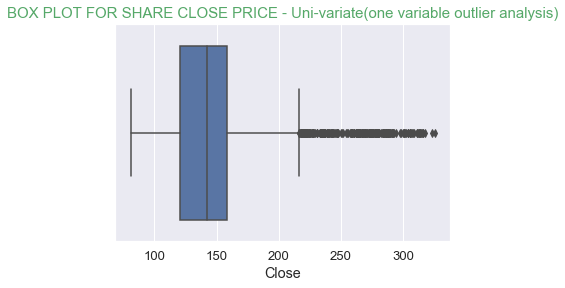

In [11]:
sns.boxplot(x=df['Close'])

plt.title('BOX PLOT FOR SHARE CLOSE PRICE - Uni-variate(one variable outlier analysis)', fontsize=15, color='g')

print('SHARE PRICE WILL CHANGE ON DIFFERENT CIRCUMSTANCE - SO WE WILL NOT REMOVE OUTLIER VALUE')

Text(0.5, 1.0, 'HISTOGRAM PLOT FOR SHARE CLOSEING PRICE ')

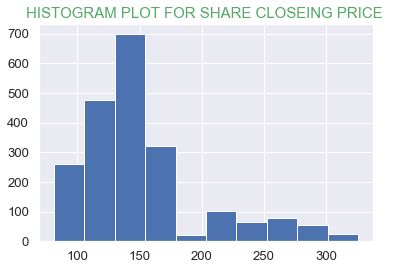

In [12]:
plt.hist(df['Close'])

plt.title('HISTOGRAM PLOT FOR SHARE CLOSEING PRICE ', fontsize=15, color='g')

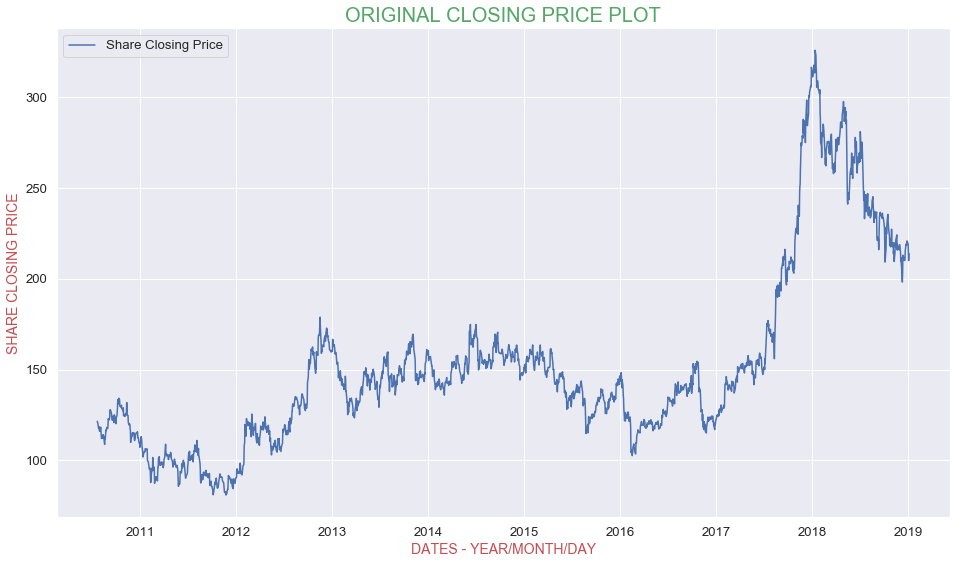

In [13]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df['Close'], label='Share Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
ax.legend()

In [14]:
df1 =  df.loc[:,['Date','Close']]
df1.index = range(len(df))
df1.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


# FEATURE EXTRACTING

In [15]:
# FEATURE EXTRACTING
column_1 = df1.iloc[:,0]
column_2 = df1.iloc[:,1]

#print (column_2)
new_data1 = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "dayofyear": column_1.dt.dayofyear,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
              "Close": column_2,
              "Date": column_1,
             })

new_data1.head(10)

,year,month,day,dayofyear,weekofyear,dayofweek,weekday,quarter,Close,Date
0,2010,7,21,202,29,2,2,3,121.55,2010-07-21
1,2010,7,22,203,29,3,3,3,120.90,2010-07-22
2,2010,7,23,204,29,4,4,3,120.65,2010-07-23
3,2010,7,26,207,30,0,0,3,117.60,2010-07-26
4,2010,7,27,208,30,1,1,3,118.65,2010-07-27
5,2010,7,28,209,30,2,2,3,118.25,2010-07-28
6,2010,7,29,210,30,3,3,3,116.60,2010-07-29
7,2010,7,30,211,30,4,4,3,116.05,2010-07-30
8,2010,8,2,214,31,0,0,3,117.30,2010-08-02
9,2010,8,3,215,31,1,1,3,118.30,2010-08-03


# ADDING NEW FEATURE..ASSUME MONDAY & FRIDAY STOCK PRICE MAY BE HIGH..

In [16]:
# Set 0 to mon_fri Column
new_data1['mon_fri'] = 0 

# FOR MONDAY SET VALUE 1
new_data1.loc[new_data1.dayofweek == 0, 'mon_fri'] = 1

# FOR FRIDAY SET VALUE 1
new_data1.loc[new_data1.dayofweek == 4, 'mon_fri'] = 1

new_data1.head(10)

,year,month,day,dayofyear,weekofyear,dayofweek,weekday,quarter,Close,Date,mon_fri
0,2010,7,21,202,29,2,2,3,121.55,2010-07-21,0
1,2010,7,22,203,29,3,3,3,120.90,2010-07-22,0
2,2010,7,23,204,29,4,4,3,120.65,2010-07-23,1
3,2010,7,26,207,30,0,0,3,117.60,2010-07-26,1
4,2010,7,27,208,30,1,1,3,118.65,2010-07-27,0
5,2010,7,28,209,30,2,2,3,118.25,2010-07-28,0
6,2010,7,29,210,30,3,3,3,116.60,2010-07-29,0
7,2010,7,30,211,30,4,4,3,116.05,2010-07-30,1
8,2010,8,2,214,31,0,0,3,117.30,2010-08-02,1
9,2010,8,3,215,31,1,1,3,118.30,2010-08-03,0


# CREATE TRAIN AND TEST DATA FOR 15 DAYS PREDICTION

In [17]:
totalrowno = len(new_data1)
#print(totalrowno)

# Split the data into training/testing sets
train = new_data1[:(totalrowno-15)] 
test = new_data1[(totalrowno-15):] 

# X_TRAIN WITHOUT CLOSE PRICE AND DATE
# TRAIN USING OTHER FEATURES LIKE day,dayofweek......mon_fri
x_train = train.drop(['Close','Date'], axis=1) 
x_test = test.drop(['Close','Date'], axis=1) 

# Split the targets into training/testing sets
y_train = train['Close'] 
y_test = test['Close']

print('X TRAIN DATA ', x_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', x_test.shape)
print('Y TRAIN DATA ', y_test.shape)

X TRAIN DATA  (2085, 9)
Y TRAIN DATA  (2085,)
X TEST DATA  (15, 9)
Y TRAIN DATA  (15,)


# CREATE LINEAR REGRESSION MODEL FOR 15 DAYS PREDICTION

In [18]:
#implement linear regression 
from sklearn.linear_model import LinearRegression 

# Create linear regression object
regression_model_object = LinearRegression() 

# Train the model using the training sets
regression_model_object.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 15 DAYS PREDICTION

In [19]:
# Make predictions using the testing set
# 15 DAYS PREDICTION
stcokclose_predict_15days = regression_model_object.predict(x_test)

In [20]:
df_15days = new_data1.loc[(len(new_data1) - 15):,['Date','Close']]
df_15days['PClose'] = stcokclose_predict_15days[(len(stcokclose_predict_15days) - 15):]
df_15days.head(15)
#df_15days.to_csv('2.1.LinearRegression15DaysPrediction.csv')

,Date,Close,PClose
2085,2018-12-14,212.35,212.161507
2086,2018-12-17,210.05,211.979518
2087,2018-12-18,210.10,211.742458
2088,2018-12-19,210.15,211.680515
2089,2018-12-20,210.20,211.618573
2090,2018-12-21,215.40,211.731747
2091,2018-12-24,219.05,211.549758
2092,2018-12-26,218.55,211.250756
2093,2018-12-27,220.05,211.188813
2094,2018-12-28,220.80,211.301988


# ERROR CLACULATION

In [21]:
x = np.power((np.array(df_15days['Close'])-df_15days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('15 DAYS LINEAR REGRESSION MODEL- RMSE VALUE ', rmse)

15 DAYS LINEAR REGRESSION MODEL- RMSE VALUE  5.307902409333924


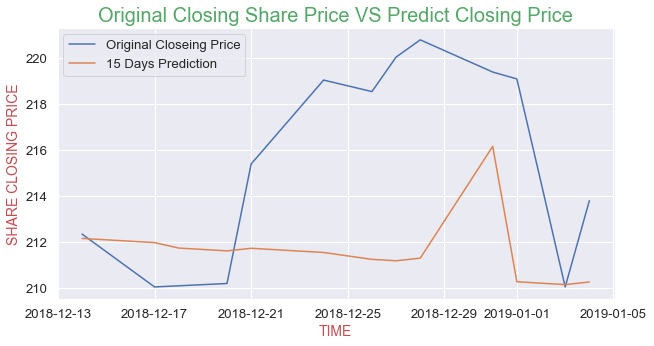

In [22]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_15days['Date'],df_15days['Close'], label='Original Closeing Price')
ax.plot(df_15days['Date'],df_15days['PClose'], label='15 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 45 DAYS PREDICTION

In [23]:
totalrowno = len(new_data1)
#print(totalrowno)

# Split the data into training/testing sets
train = new_data1[:(totalrowno-45)] 
test = new_data1[(totalrowno-45):] 

# X_TRAIN WITHOUT CLOSE PRICE AND DATE
# TRAIN USING OTHER FEATURES LIKE day,dayofweek......mon_fri
x_train = train.drop(['Close','Date'], axis=1) 
x_test = test.drop(['Close','Date'], axis=1) 

# Split the targets into training/testing sets
y_train = train['Close'] 
y_test = test['Close']

print('X TRAIN DATA ', x_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', x_test.shape)
print('Y TRAIN DATA ', y_test.shape)

X TRAIN DATA  (2055, 9)
Y TRAIN DATA  (2055,)
X TEST DATA  (45, 9)
Y TRAIN DATA  (45,)


# CREATE LINEAR REGRESSION MODEL FOR 45 DAYS PREDICTION

In [24]:
#implement linear regression 
from sklearn.linear_model import LinearRegression 

# Create linear regression object
regression_model_object = LinearRegression() 

# Train the model using the training sets
regression_model_object.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 45 DAYS PREDICTION

In [25]:
# Make predictions using the testing set
stcokclose_predict_45days = regression_model_object.predict(x_test)

In [26]:
df_45days = new_data1.loc[(len(new_data1) - 45):,['Date','Close']]
df_45days['PClose'] = stcokclose_predict_45days[(len(stcokclose_predict_45days) - 45):]
df_45days.head()
#df_45days.to_csv('2.2.LinearRegression45DaysPrediction.csv')

,Date,Close,PClose
2055,2018-10-31,217.85,214.024489
2056,2018-11-01,217.75,211.959432
2057,2018-11-02,217.65,212.076390
2058,2018-11-05,219.85,211.892547
2059,2018-11-06,213.80,211.640225


# ERROR CLACULATION

In [27]:
x = np.power((np.array(df_45days['Close'])-df_45days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('45 DAYS LINEAR REGRESSION MODEL- RMSE VALUE ', rmse)

45 DAYS LINEAR REGRESSION MODEL- RMSE VALUE  6.473754230605425


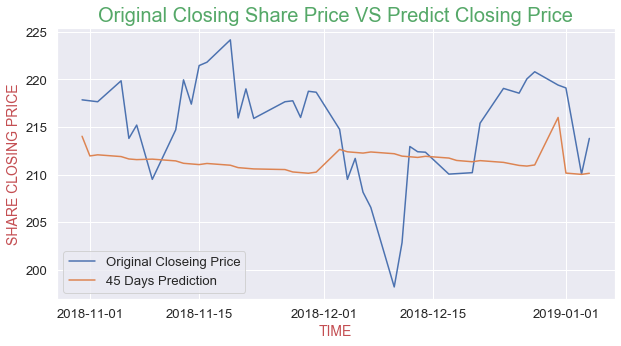

In [28]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_45days['Date'],df_45days['Close'], label='Original Closeing Price')
ax.plot(df_45days['Date'],df_45days['PClose'], label='45 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 90 DAYS PREDICTION

In [29]:
totalrowno = len(new_data1)
#print(totalrowno)

# Split the data into training/testing sets
train = new_data1[:(totalrowno-90)] 
test = new_data1[(totalrowno-90):] 

# X_TRAIN WITHOUT CLOSE PRICE AND DATE
# TRAIN USING OTHER FEATURES LIKE day,dayofweek......mon_fri
x_train = train.drop(['Close','Date'], axis=1) 
x_test = test.drop(['Close','Date'], axis=1) 

# Split the targets into training/testing sets
y_train = train['Close'] 
y_test = test['Close']

print('X TRAIN DATA ', x_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', x_test.shape)
print('Y TRAIN DATA ', y_test.shape)

X TRAIN DATA  (2010, 9)
Y TRAIN DATA  (2010,)
X TEST DATA  (90, 9)
Y TRAIN DATA  (90,)


# CREATE LINEAR REGRESSION MODEL FOR 90 DAYS PREDICTION

In [30]:
#implement linear regression 
from sklearn.linear_model import LinearRegression 

# Create linear regression object
regression_model_object = LinearRegression() 

# Train the model using the training sets
regression_model_object.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 90 DAYS PREDICTION

In [31]:
# Make predictions using the testing set
stcokclose_predict_90days = regression_model_object.predict(x_test)

In [32]:
df_90days = new_data1.loc[(len(new_data1) - 90):,['Date','Close']]
df_90days['PClose'] = stcokclose_predict_90days[(len(stcokclose_predict_90days) - 90):]
df_90days.head()
#df_90days.to_csv('2.3.LinearRegression90DaysPrediction.csv')

,Date,Close,PClose
2010,2018-08-23,235.45,206.624676
2011,2018-08-24,231.00,206.636150
2012,2018-08-27,237.05,206.335164
2013,2018-08-28,233.35,206.179219
2014,2018-08-29,234.55,206.106984


# ERROR CLACULATION

In [33]:
x = np.power((np.array(df_90days['Close'])-df_90days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('90 DAYS LINEAR REGRESSION MODEL- RMSE VALUE ', rmse)

90 DAYS LINEAR REGRESSION MODEL- RMSE VALUE  16.732867796066845


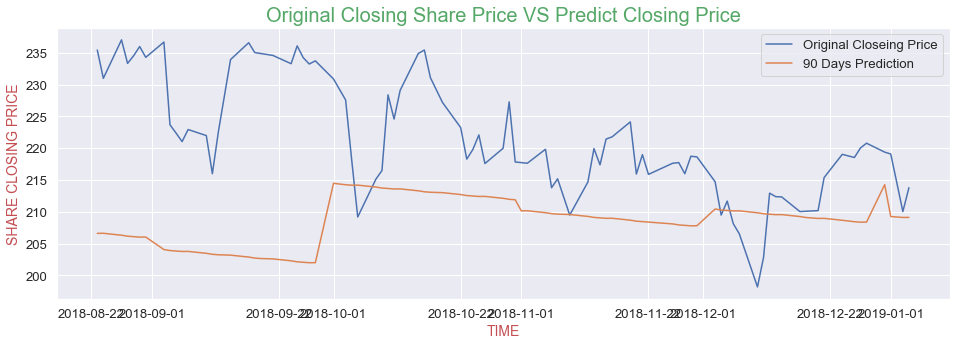

In [34]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,5))

ax.plot(df_90days['Date'],df_90days['Close'], label='Original Closeing Price')
ax.plot(df_90days['Date'],df_90days['PClose'], label='90 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()